# Student Dropout Analysis for School Education

In [1]:
# Importing Required Libraries
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler




from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import VotingClassifier

In [2]:
# Load the dataset
data = pd.read_csv("C:\\Users\\Dhairya Hindoriya\\BDT Mini project\\SIH3-updated1.csv")

# Data Preprocessing

In [3]:
data.rename(columns = {'Age at enrollment':'Age'}, inplace = True)

In [4]:
data.isnull().sum()/len(data)*100

Course                              0.045188
Age                                 0.000000
Daytime/evening attendance          0.045188
Area                                0.045188
Caste                               0.045188
Displaced                           0.045188
Educational special needs           0.045188
Debtor                              0.045188
Tuition fees up to date             0.045188
Gender                              0.000000
Scholarship holder                  0.045188
Curricular units 1st sem (grade)    0.045188
Curricular units 2nd sem (grade)    0.045188
Unemployment rate                   0.045188
Inflation rate                      0.045188
GDP                                 0.045188
Target                              0.045188
Previous Qualification              0.000000
dtype: float64

In [5]:
print(data["Target"].unique())

['Dropout' 'Graduate' 'Enrolled' nan]


In [6]:
data['Target'] = data['Target'].map({
    'Dropout':0,
    'Enrolled':1,
    'Graduate':2
})


In [7]:
data.corr()['Target']

Age                                -0.005263
Daytime/evening attendance          0.075107
Displaced                           0.113986
Educational special needs          -0.007353
Debtor                             -0.240999
Tuition fees up to date             0.409827
Scholarship holder                  0.297595
Curricular units 1st sem (grade)    0.485207
Curricular units 2nd sem (grade)    0.566827
Unemployment rate                   0.008627
Inflation rate                     -0.026874
GDP                                 0.044135
Target                              1.000000
Previous Qualification              0.018078
Name: Target, dtype: float64

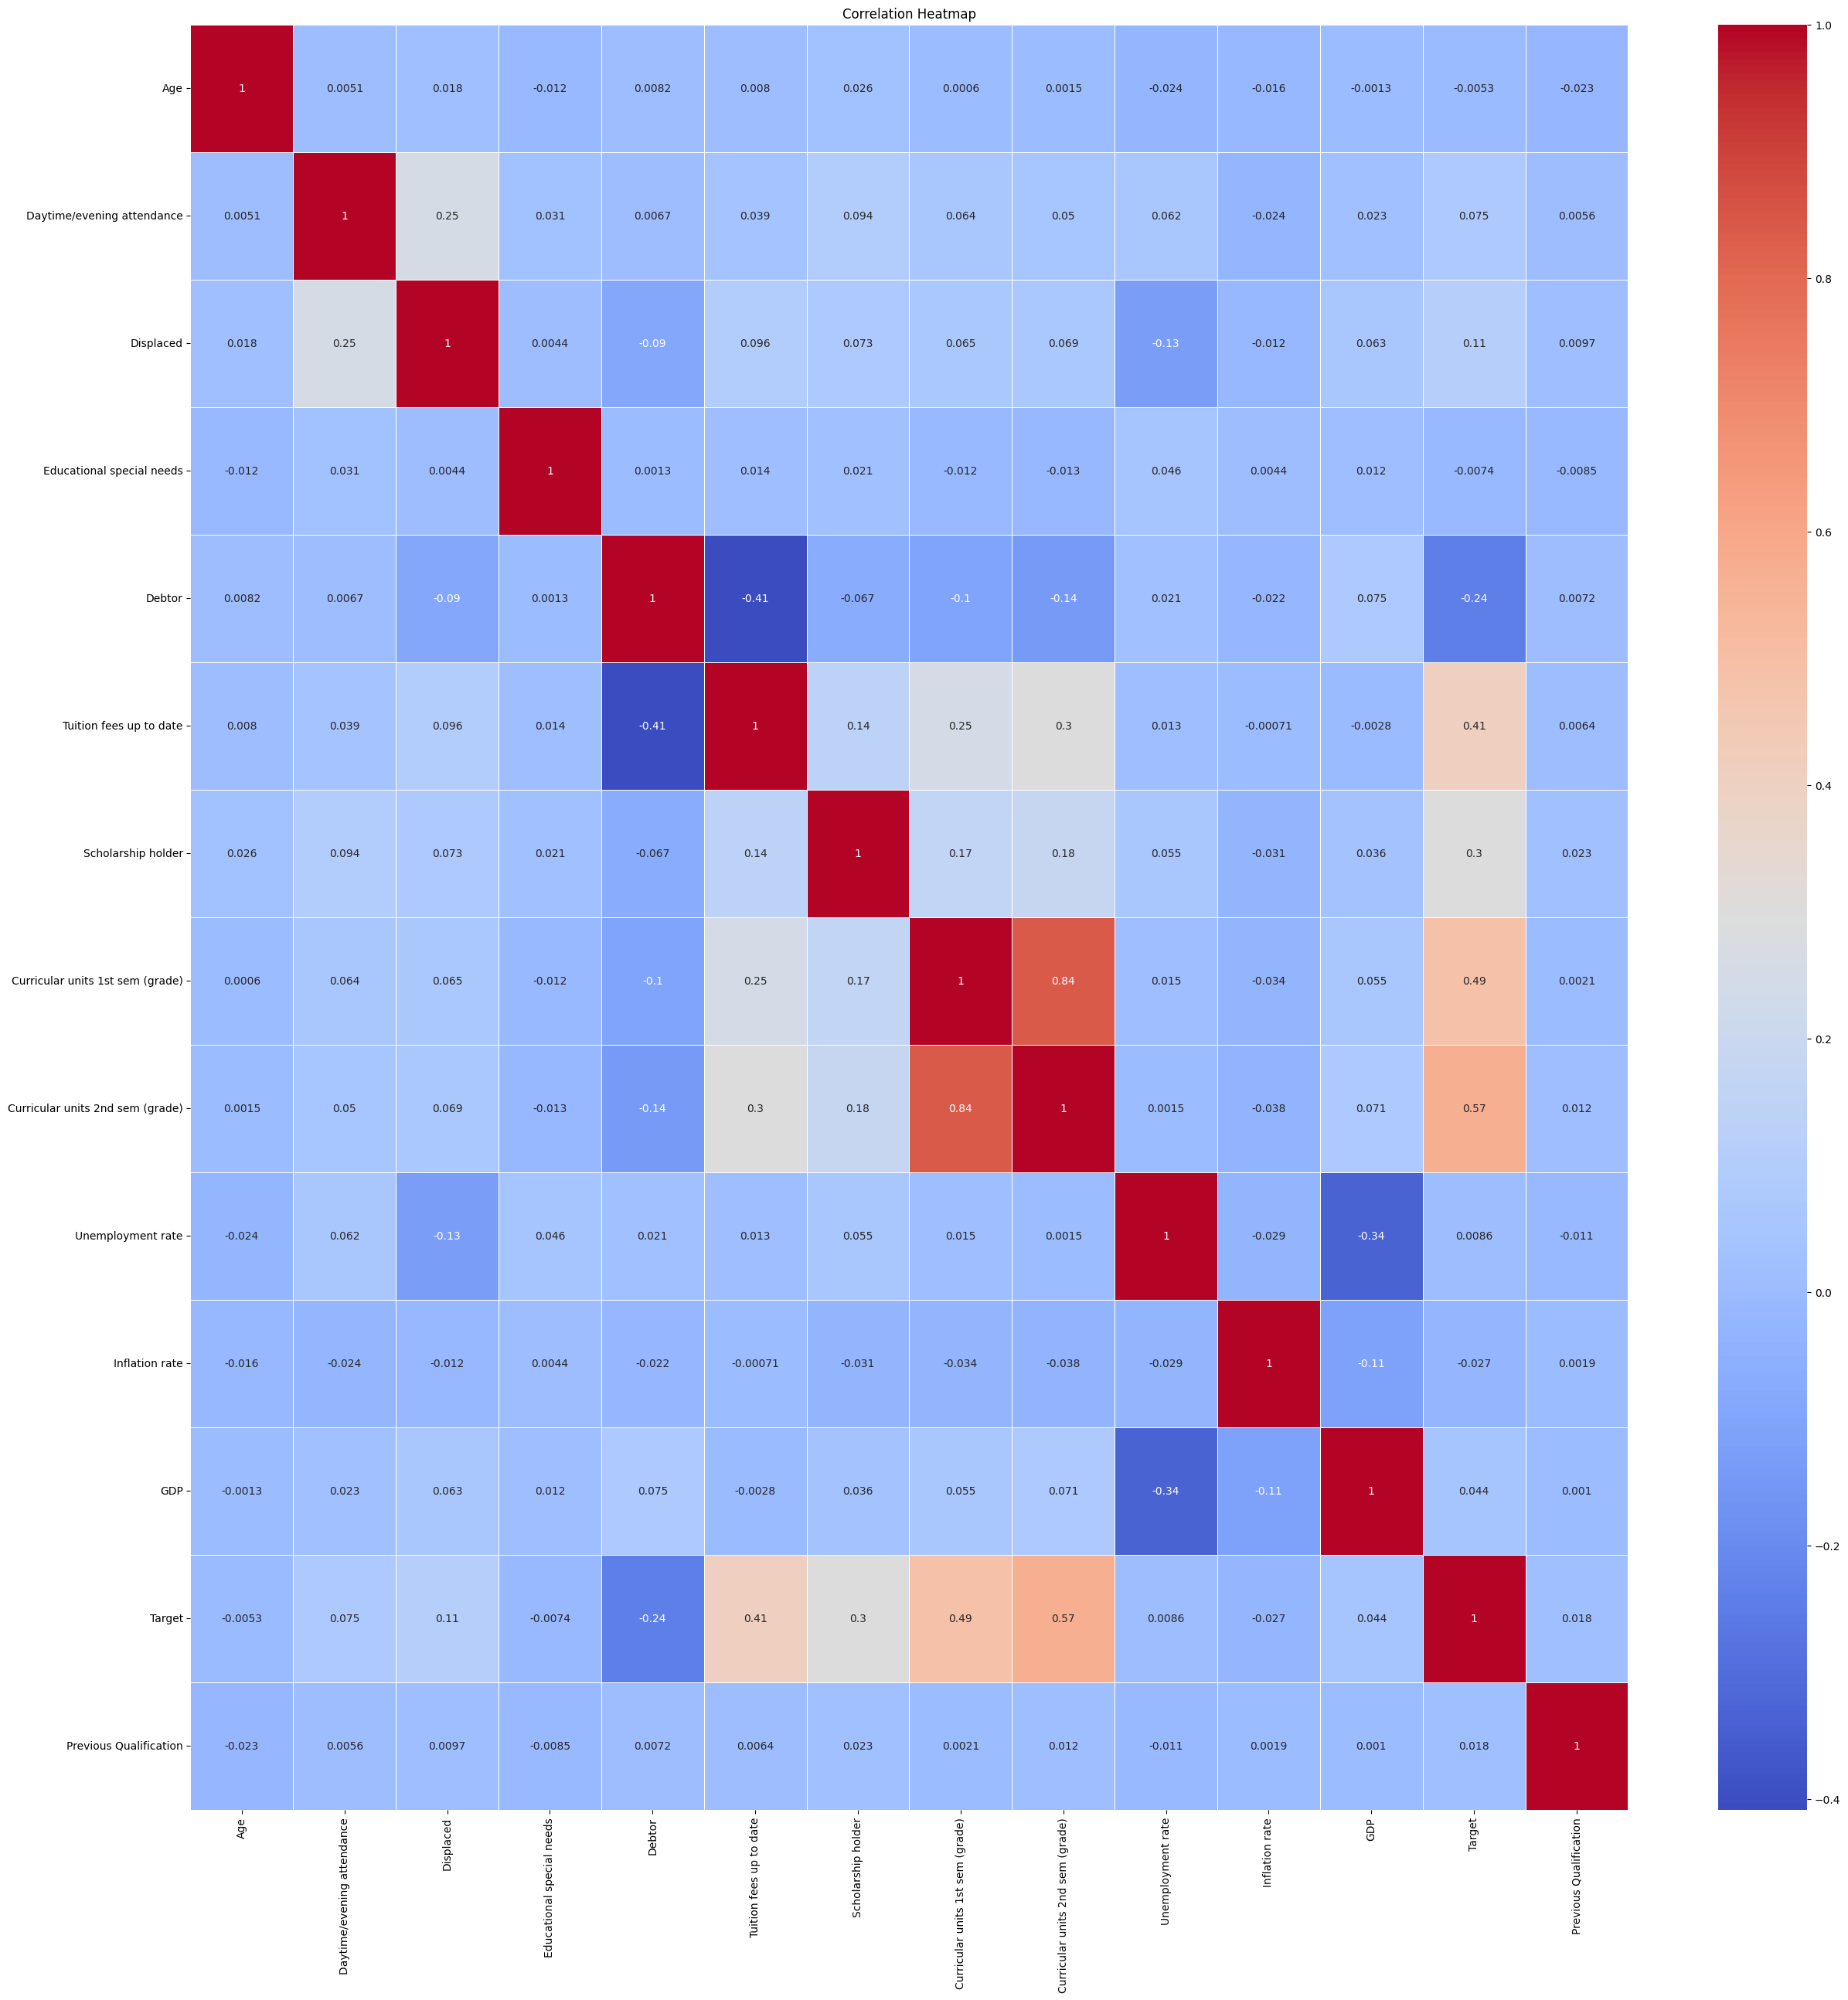

In [8]:
plt.figure(figsize=(30, 30))
sns.heatmap(data.corr() , annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [9]:
new_data = data.copy()
new_data = new_data.drop(columns=['Educational special needs',  
                                  'Unemployment rate', 
                                  'Inflation rate'], axis=1)
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4426 entries, 0 to 4425
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Course                            4424 non-null   object 
 1   Age                               4426 non-null   int64  
 2   Daytime/evening attendance        4424 non-null   float64
 3   Area                              4424 non-null   object 
 4   Caste                             4424 non-null   object 
 5   Displaced                         4424 non-null   float64
 6   Debtor                            4424 non-null   float64
 7   Tuition fees up to date           4424 non-null   float64
 8   Gender                            4426 non-null   object 
 9   Scholarship holder                4424 non-null   float64
 10  Curricular units 1st sem (grade)  4424 non-null   float64
 11  Curricular units 2nd sem (grade)  4424 non-null   float64
 12  GDP   

# Exploratory Data Analysis


In [10]:
print(data["Target"].unique())

[ 0.  2.  1. nan]


In [11]:
new_data['Target'].value_counts()

2.0    2209
0.0    1421
1.0     794
Name: Target, dtype: int64

In [12]:
x = new_data['Target'].value_counts().index
y = new_data['Target'].value_counts().values

df = pd.DataFrame({
    'Target': x,
    'Count_T' : y
})

fig = px.pie(df,
             names ='Target', 
             values ='Count_T',
            title='How many dropouts, enrolled & graduates are there in Target column')

fig.update_traces(labels=['Graduate','Dropout','Enrolled'], hole=0.4,textinfo='value+label', pull=[0,0.2,0.1])
fig.show()


/opt/anaconda3/lib/python3.9/site-packages/numpy/core/numeric.py:2446: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



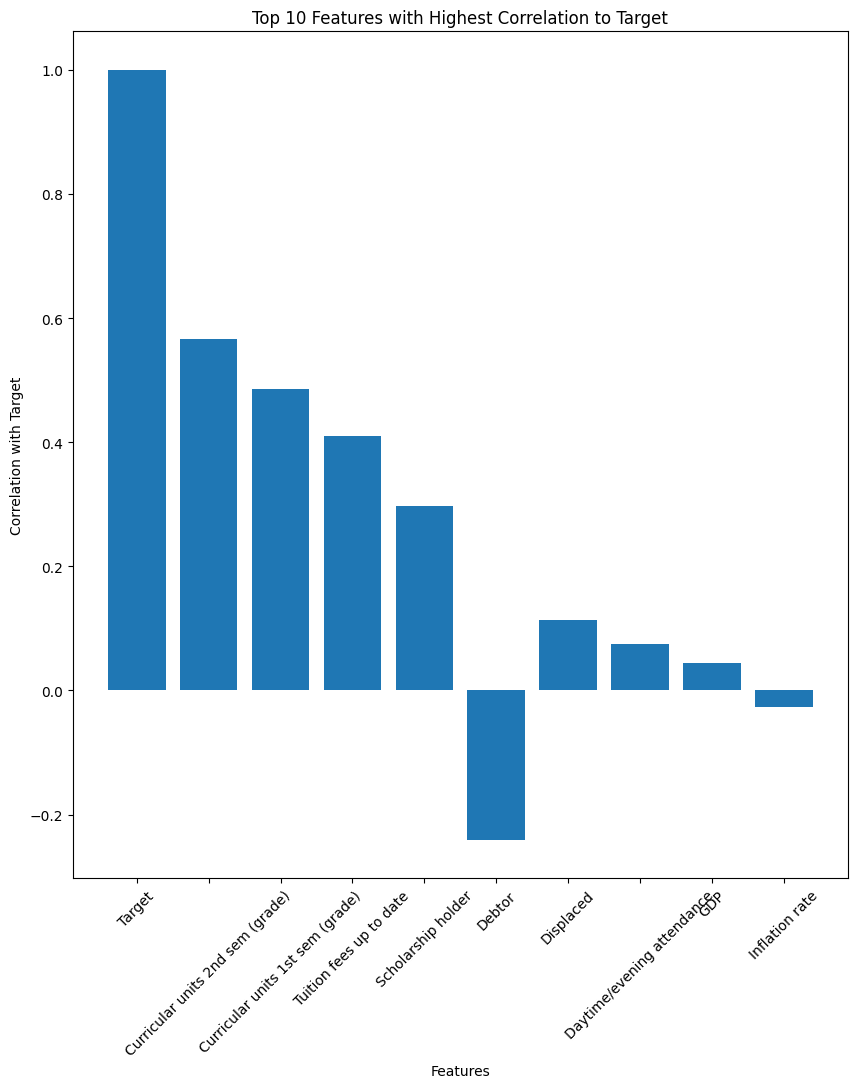

In [13]:
correlations = data.corr()['Target']
top_10_features = correlations.abs().nlargest(10).index
top_10_corr_values = correlations[top_10_features]

plt.figure(figsize=(10, 11))
plt.bar(top_10_features, top_10_corr_values)
plt.xlabel('Features')
plt.ylabel('Correlation with Target')
plt.title('Top 10 Features with Highest Correlation to Target')
plt.xticks(rotation=45)
plt.show()

In [14]:
px.histogram(new_data['Age'], x='Age',color_discrete_sequence=['lightblue'])


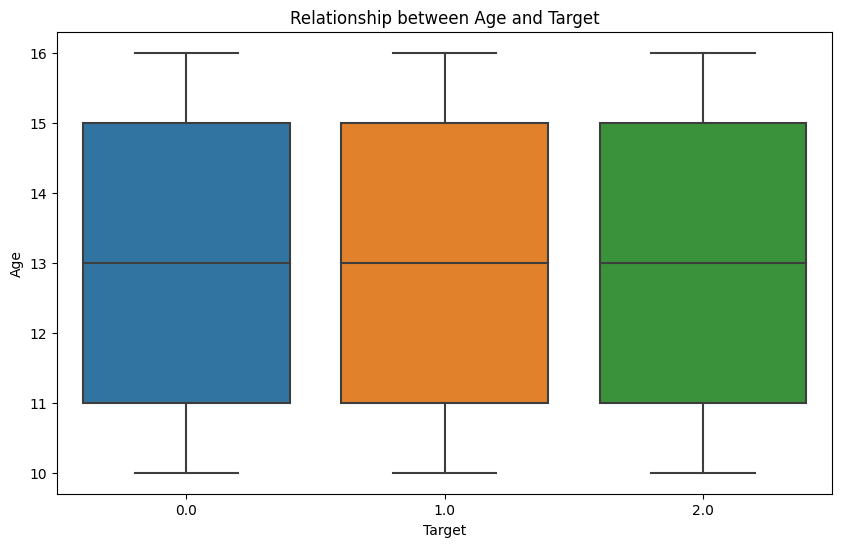

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Target', y='Age', data=new_data)
plt.xlabel('Target')
plt.ylabel('Age')
plt.title('Relationship between Age and Target')
plt.show()

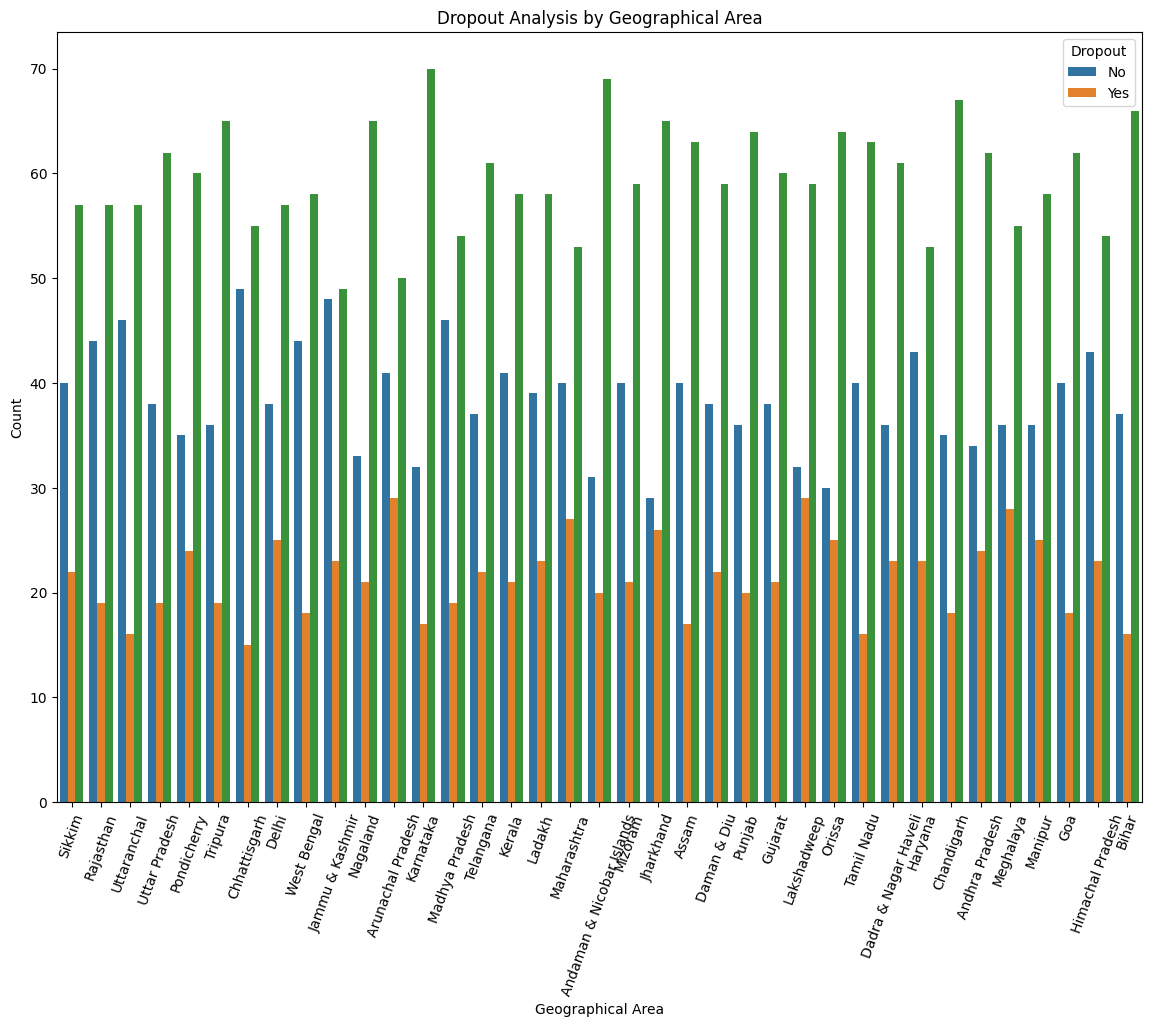

In [16]:
# 1. Dropout by geographical area
plt.figure(figsize=(14, 10))
sns.countplot(data=data, x='Area',hue='Target')
plt.xlabel('Geographical Area')
plt.ylabel('Count')
plt.title('Dropout Analysis by Geographical Area')
plt.xticks(rotation=70)
plt.legend(title='Dropout', labels=['No', 'Yes'])
plt.show()


In [17]:
# 2. Gender-wise dropout analysis
gender_dropout_counts = data.groupby('Gender')['Target'].mean()
fig = px.bar(gender_dropout_counts, x=gender_dropout_counts.index, y='Target',
             labels={'Gender': 'Gender', 'Target': 'Dropout Rate'},
             title='Gender-wise Dropout Analysis')
fig.show()

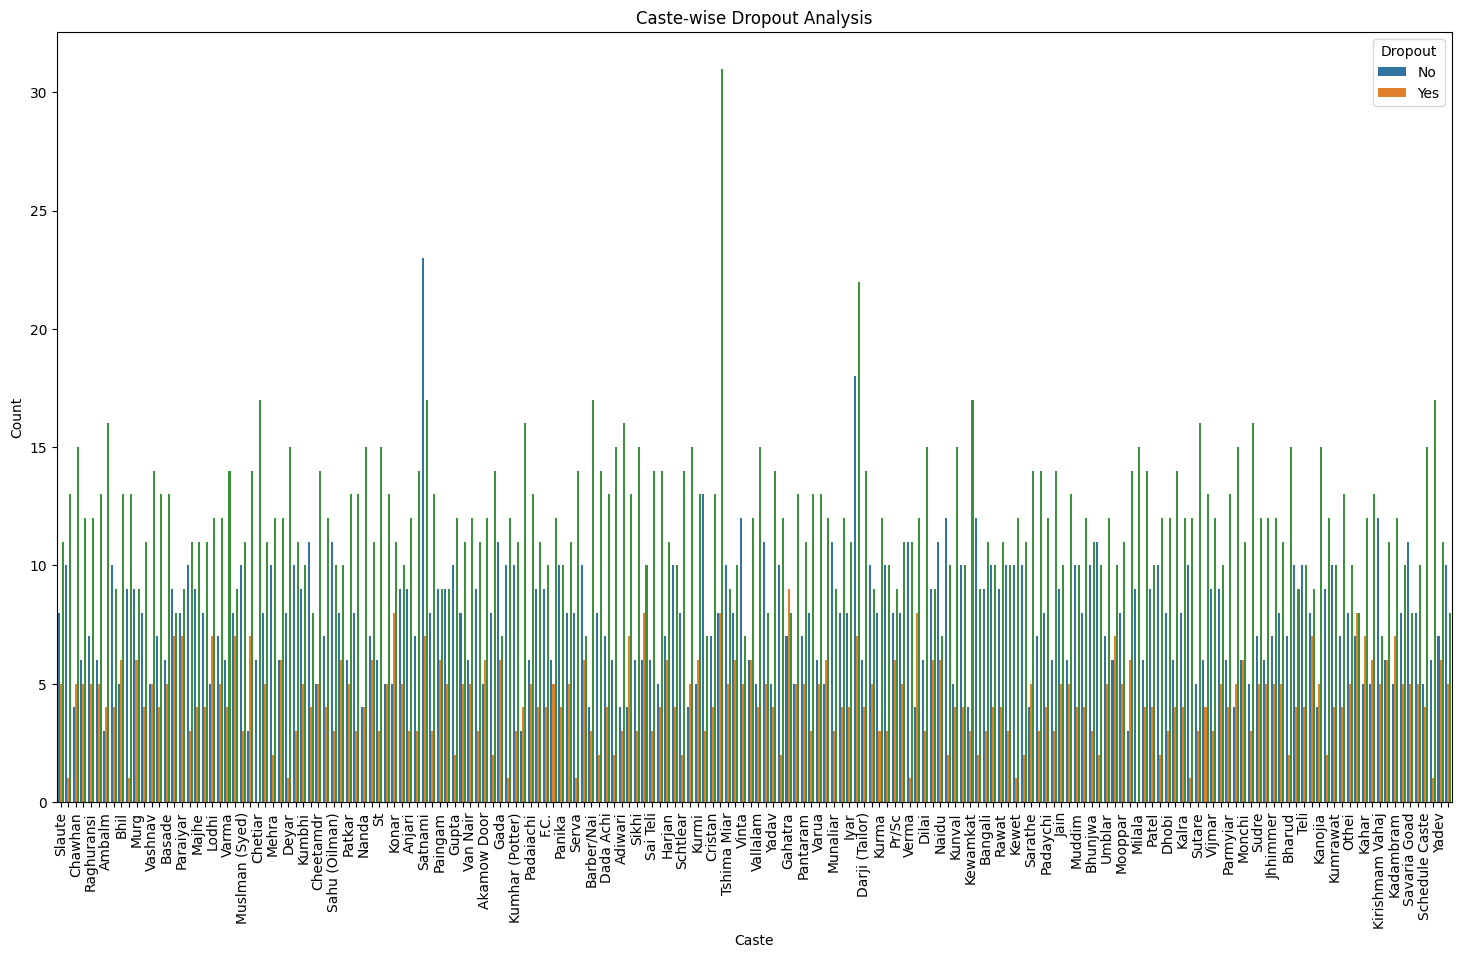

In [18]:
# 3. Caste-wise dropout analysis
plt.figure(figsize=(18, 10))
ax = sns.countplot(data=data, x='Caste', hue='Target')
plt.xlabel('Caste')
plt.ylabel('Count')
plt.title('Caste-wise Dropout Analysis')
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees for better readability
plt.legend(title='Dropout', labels=['No', 'Yes'])

# Optionally, you can selectively display labels
for i, label in enumerate(ax.xaxis.get_ticklabels()):
    if i % 2 != 0:
        label.set_visible(False)

plt.show()

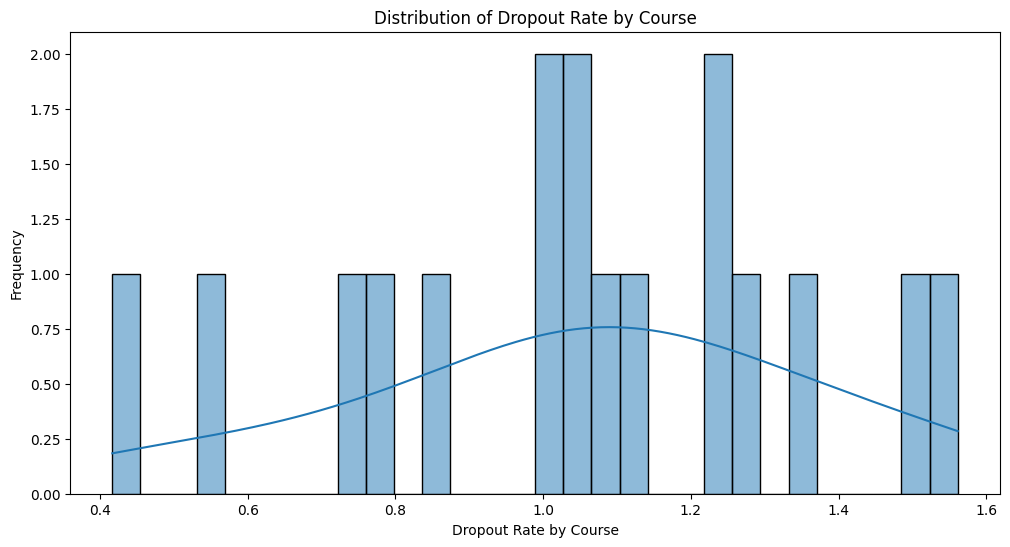

In [19]:
# 4. Distribution of student dropout by course
course_dropout_counts = data.groupby('Course')['Target'].mean()
plt.figure(figsize=(12, 6))
sns.histplot(course_dropout_counts, bins=30, kde=True)
plt.xlabel('Dropout Rate by Course')
plt.ylabel('Frequency')
plt.title('Distribution of Dropout Rate by Course')
plt.show()

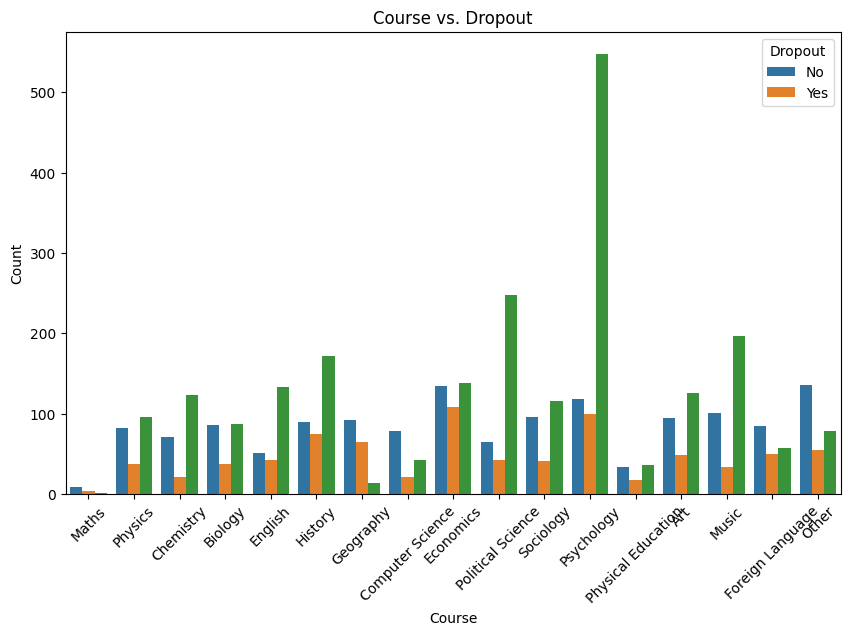

In [20]:
# 5. Analyze the impact of course on dropout
courses = ['Maths', 'Physics', 'Chemistry', 'Biology', 'English', 'History', 'Geography', 'Computer Science', 'Economics', 'Political Science', 'Sociology', 'Psychology', 'Physical Education', 'Art', 'Music', 'Foreign Language', 'Other']

plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Course', hue='Target', order=courses)
plt.xlabel('Course')
plt.ylabel('Count')
plt.title('Course vs. Dropout')
plt.xticks(rotation=45)
plt.legend(title='Dropout', labels=['No', 'Yes'])
plt.show()

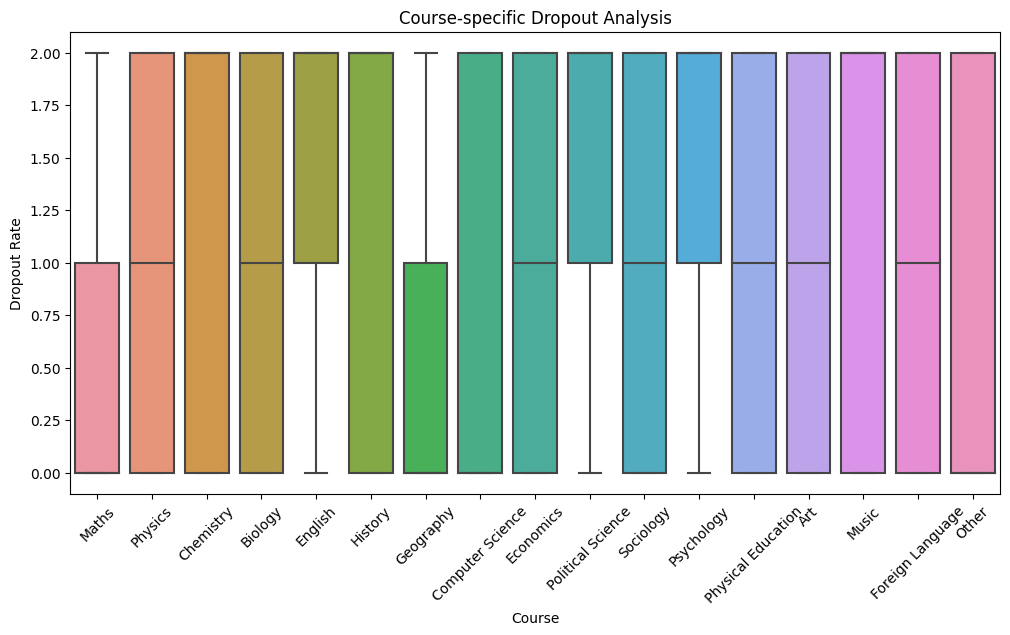

In [21]:
# 6. Course-specific Analysis
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='Course', y='Target', order=courses)
plt.xlabel('Course')
plt.ylabel('Dropout Rate')
plt.title('Course-specific Dropout Analysis')
plt.xticks(rotation=45)
plt.show()

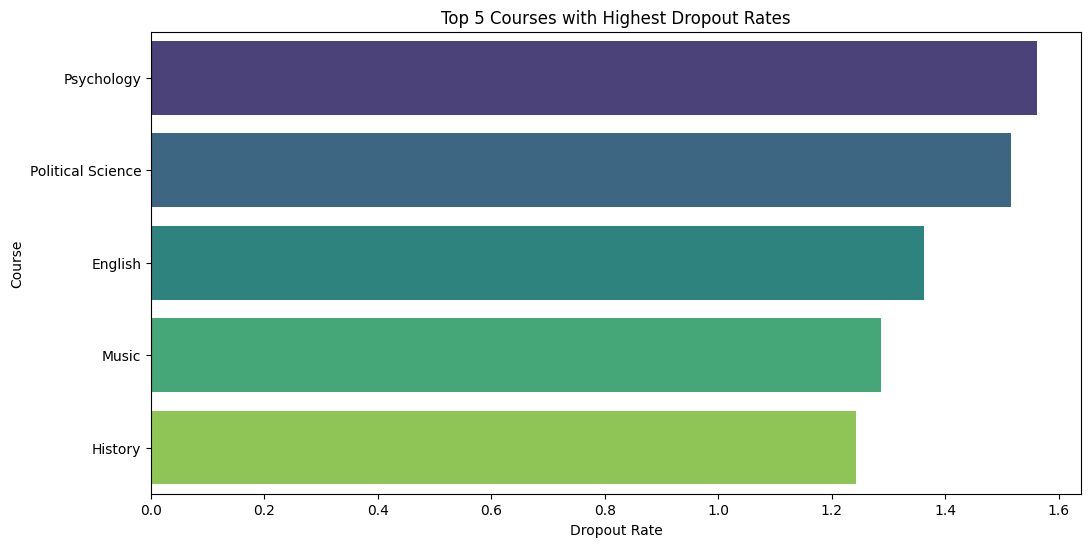

In [22]:
#7.Top 5 Courses with the Highest Dropout Rates:
course_dropout_rates = data.groupby('Course')['Target'].mean().sort_values(ascending=False).head(5)
plt.figure(figsize=(12, 6))
sns.barplot(x=course_dropout_rates.values, y=course_dropout_rates.index, palette='viridis')
plt.xlabel('Dropout Rate')
plt.ylabel('Course')
plt.title('Top 5 Courses with Highest Dropout Rates')
plt.show()


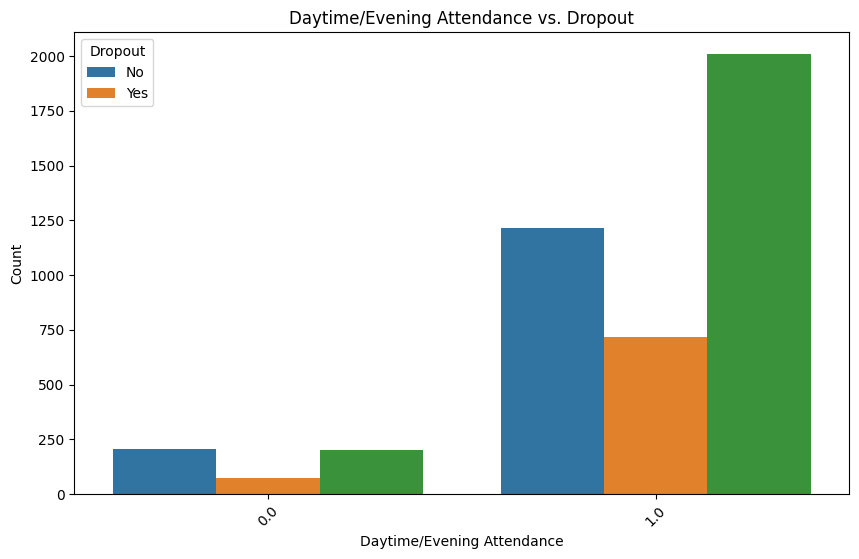

In [23]:
# 8. Analyze the impact of daytime/evening attendance on dropout
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Daytime/evening attendance', hue='Target')
plt.xlabel('Daytime/Evening Attendance')
plt.ylabel('Count')
plt.title('Daytime/Evening Attendance vs. Dropout')
plt.xticks(rotation=45)
plt.legend(title='Dropout', labels=['No', 'Yes'])
plt.show()

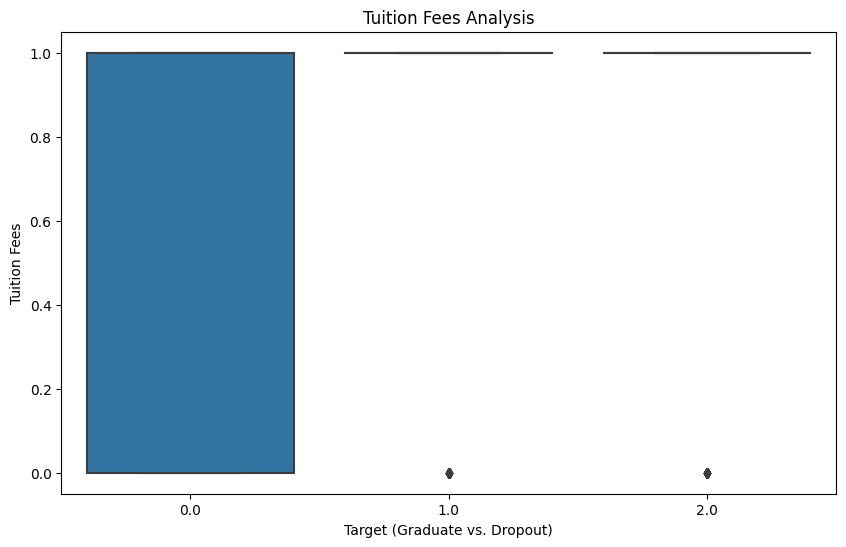

In [24]:
# 9. Tuition Fee Analysis
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Target', y='Tuition fees up to date')
plt.xlabel('Target (Graduate vs. Dropout)')
plt.ylabel('Tuition Fees')
plt.title('Tuition Fees Analysis')
plt.show()

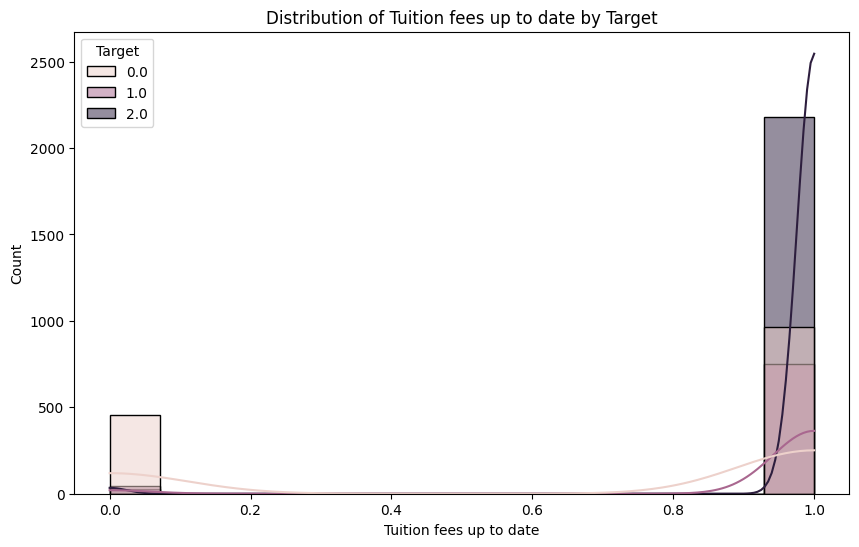

In [25]:
# 10. Histograms
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Tuition fees up to date', hue='Target', kde=True)
plt.title('Distribution of Tuition fees up to date by Target')
plt.show()

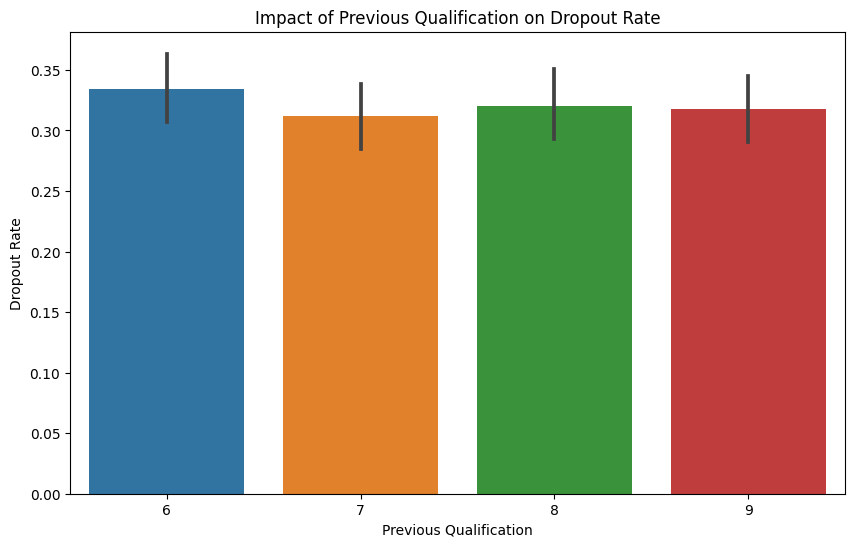

In [26]:
# 11. Impact of Previous Qualification
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='Previous Qualification', y='Target', estimator=lambda x: sum(x == 0) / len(x))
plt.xlabel('Previous Qualification')
plt.ylabel('Dropout Rate')
plt.title('Impact of Previous Qualification on Dropout Rate')
plt.show()


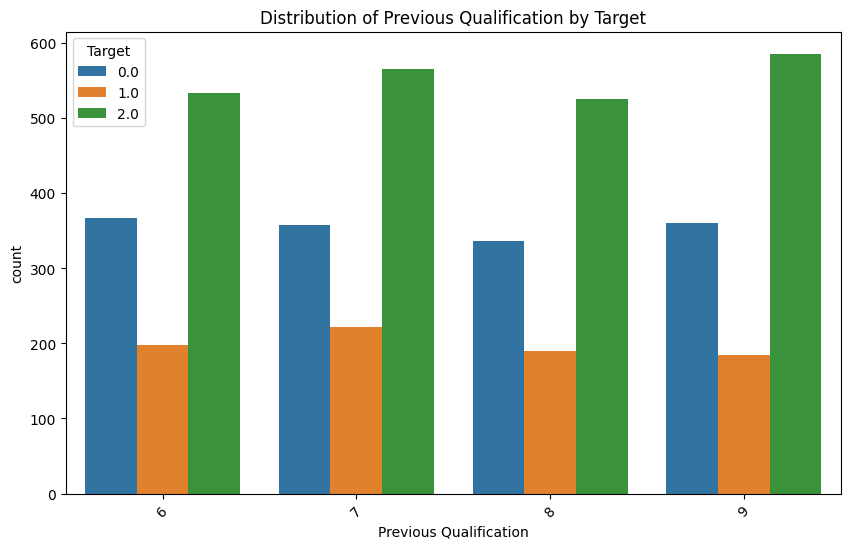

In [27]:
# 12. Bar Plot for Previous Qualification
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Previous Qualification', hue='Target')
plt.title('Distribution of Previous Qualification by Target')
plt.xticks(rotation=45)
plt.show()

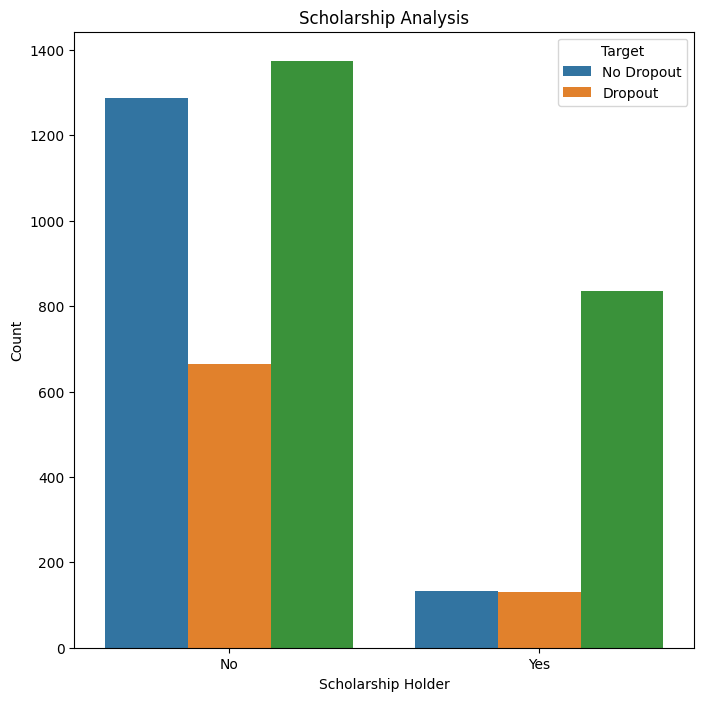

In [28]:
# 13. Scholarship Analysis
plt.figure(figsize=(8, 8))
data['Scholarship holder'] = data['Scholarship holder'].map({0: 'No', 1: 'Yes'})
sns.countplot(data=data, x='Scholarship holder', hue='Target')
plt.xlabel('Scholarship Holder')
plt.ylabel('Count')
plt.title('Scholarship Analysis')
plt.legend(title='Target', labels=['No Dropout', 'Dropout'])
plt.show()

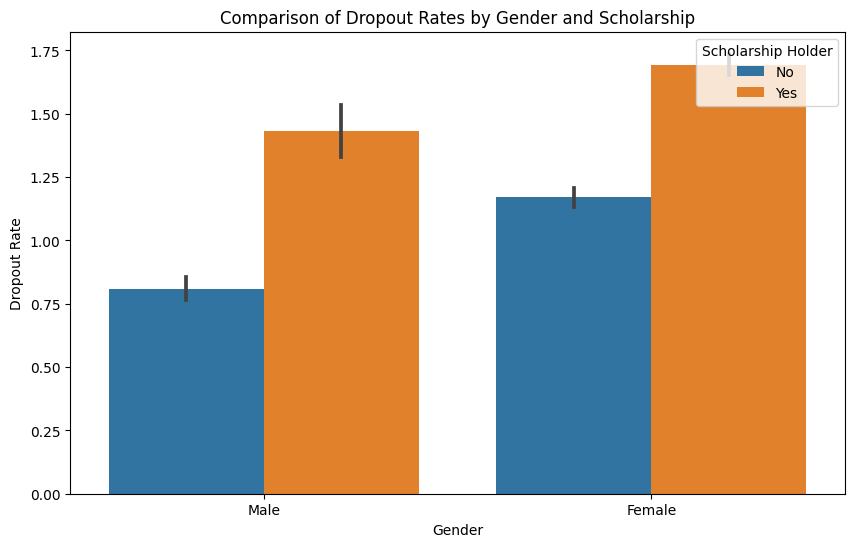

In [29]:
#14. Create a grouped bar chart to compare dropout rates by gender and scholarship
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='Gender', y='Target', hue='Scholarship holder')
plt.xlabel('Gender')
plt.ylabel('Dropout Rate')
plt.title('Comparison of Dropout Rates by Gender and Scholarship')
plt.legend(title='Scholarship Holder', loc='upper right')
plt.show()

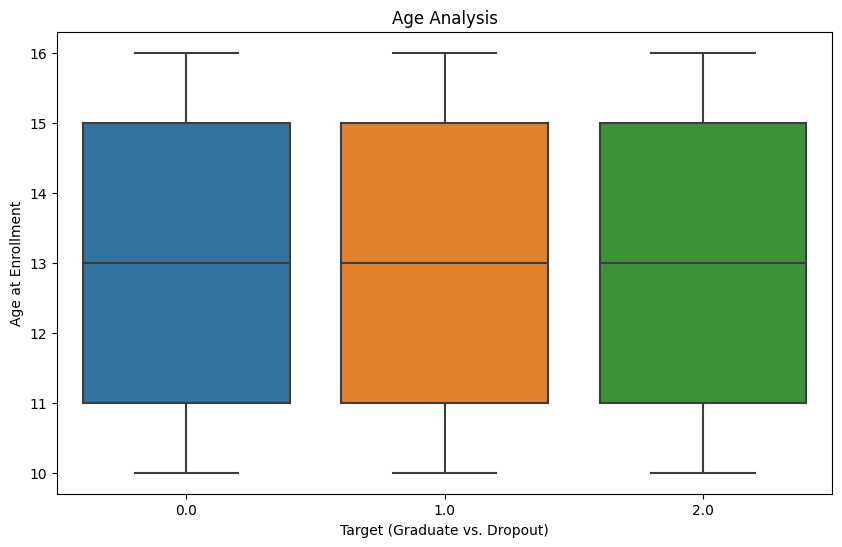

In [30]:
# 15. Age Analysis
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Target', y='Age')
plt.xlabel('Target (Graduate vs. Dropout)')
plt.ylabel('Age at Enrollment')
plt.title('Age Analysis')
plt.show()


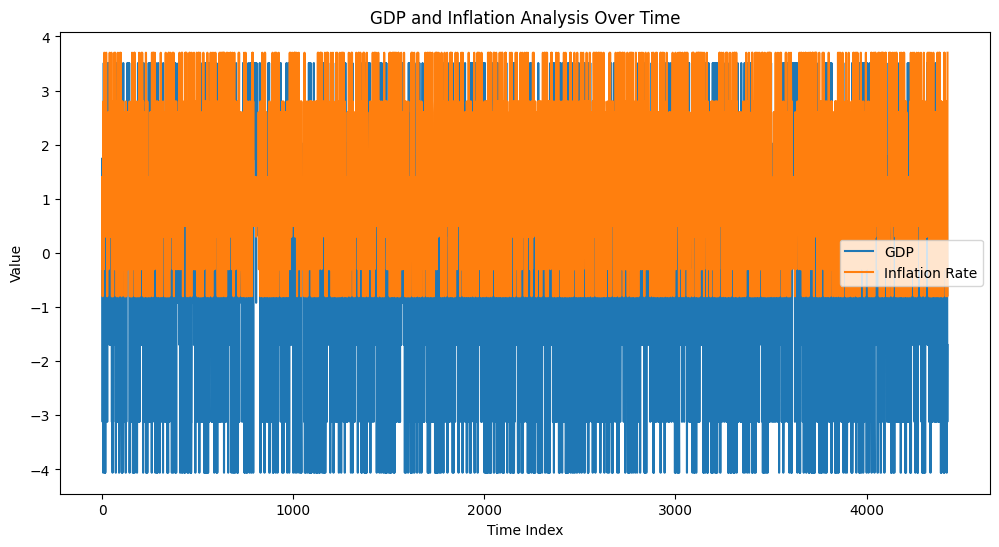

In [31]:
# 16. Impact of GDP and Inflation using row number as a time index
plt.figure(figsize=(12, 6))
sns.lineplot(data=data['GDP'], label='GDP')
sns.lineplot(data=data['Inflation rate'], label='Inflation Rate')
plt.xlabel('Time Index')
plt.ylabel('Value')
plt.title('GDP and Inflation Analysis Over Time')
plt.legend()
plt.show()


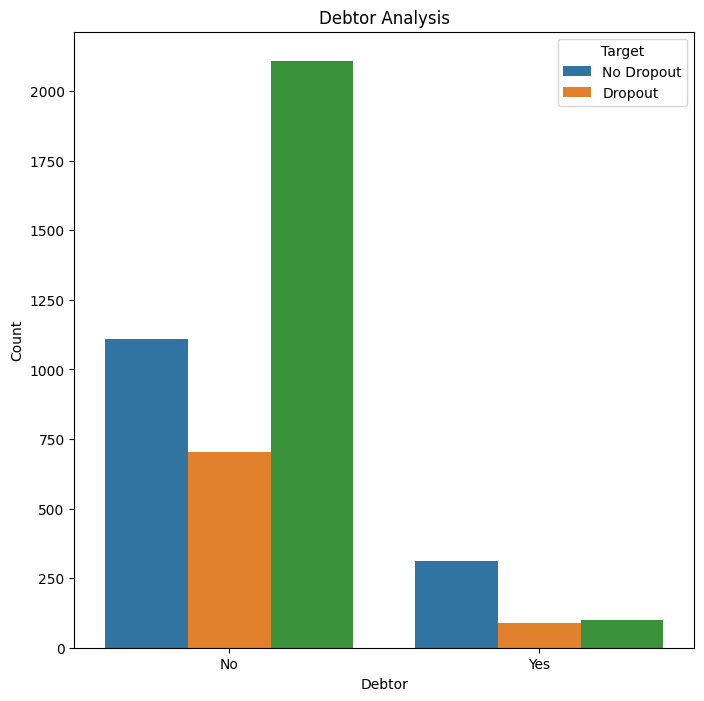

In [32]:
# 17. Debtor Analysis
plt.figure(figsize=(8, 8))
data['Debtor'] = data['Debtor'].map({0: 'No', 1: 'Yes'})
sns.countplot(data=data, x='Debtor', hue='Target')
plt.xlabel('Debtor')
plt.ylabel('Count')
plt.title('Debtor Analysis')
plt.legend(title='Target', labels=['No Dropout', 'Dropout'])
plt.show()


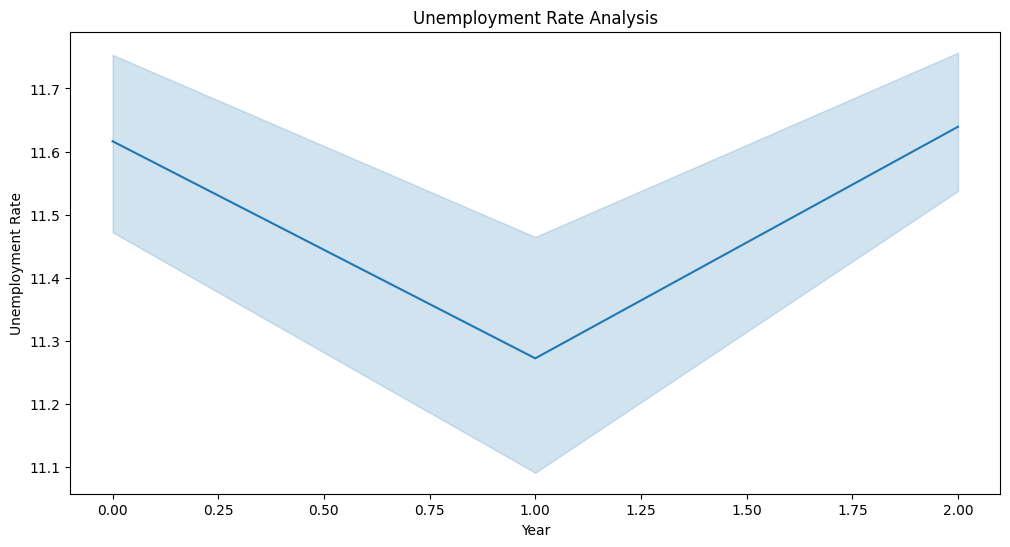

In [33]:
# 18. Unemployment Rate Analysis
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='Target', y='Unemployment rate')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.title('Unemployment Rate Analysis')
plt.show()


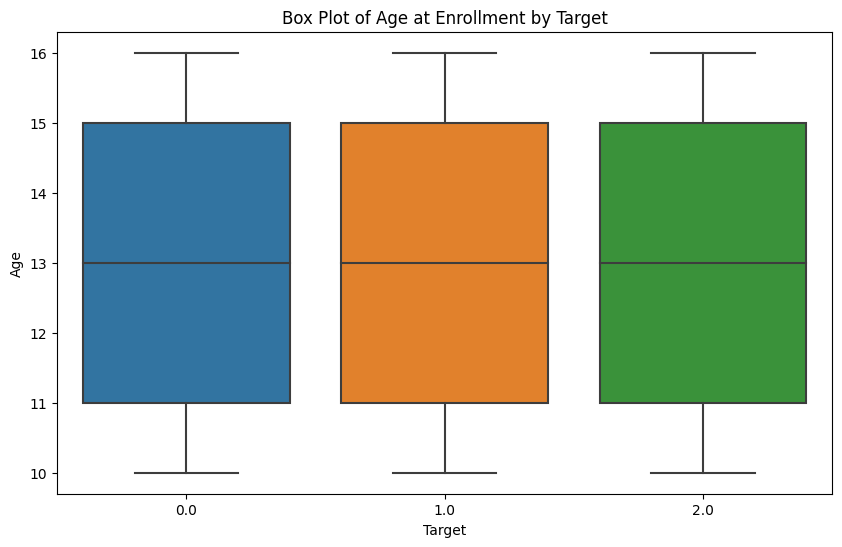

In [34]:
# 19. Box Plots
plt.figure(figsize=(10, 6))
sns.boxplot(x='Target', y='Age', data=data)
plt.title('Box Plot of Age at Enrollment by Target')
plt.show()

/Users/shiwaditya/.local/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



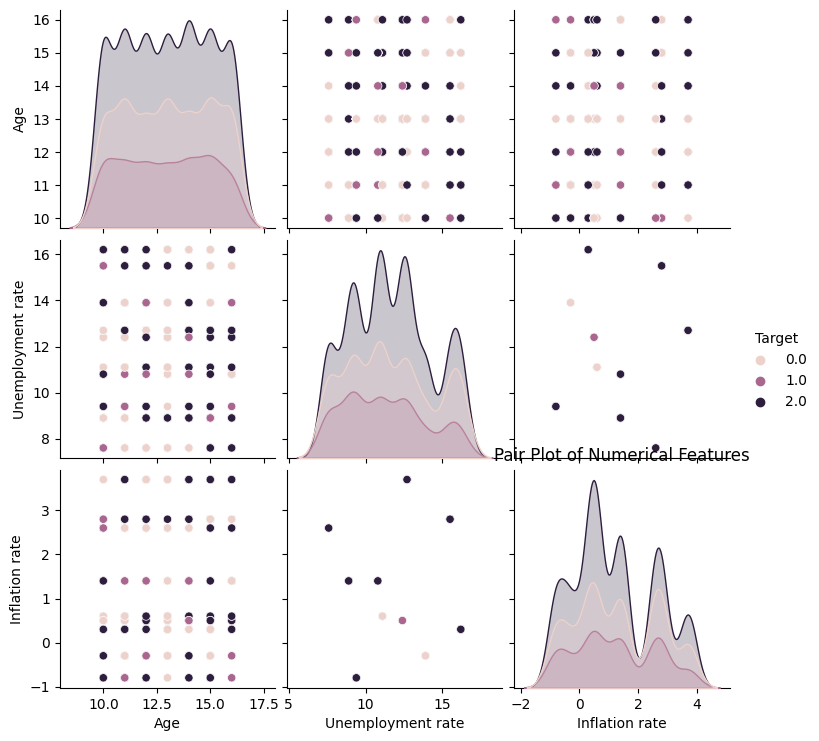

In [35]:
# 20. Pair Plot
sns.pairplot(data, hue='Target', vars=['Age', 'Unemployment rate', 'Inflation rate'])
plt.title('Pair Plot of Numerical Features')
plt.show()

/Users/shiwaditya/.local/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



<Figure size 1000x600 with 0 Axes>

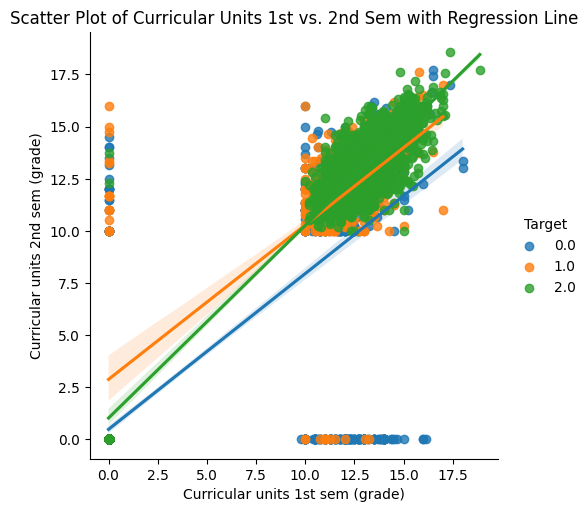

In [36]:
# 21. Scatter Plot with Regression Line
plt.figure(figsize=(10, 6))
sns.lmplot(x='Curricular units 1st sem (grade)', y='Curricular units 2nd sem (grade)', data=data, hue='Target')
plt.title('Scatter Plot of Curricular Units 1st vs. 2nd Sem with Regression Line')
plt.show()

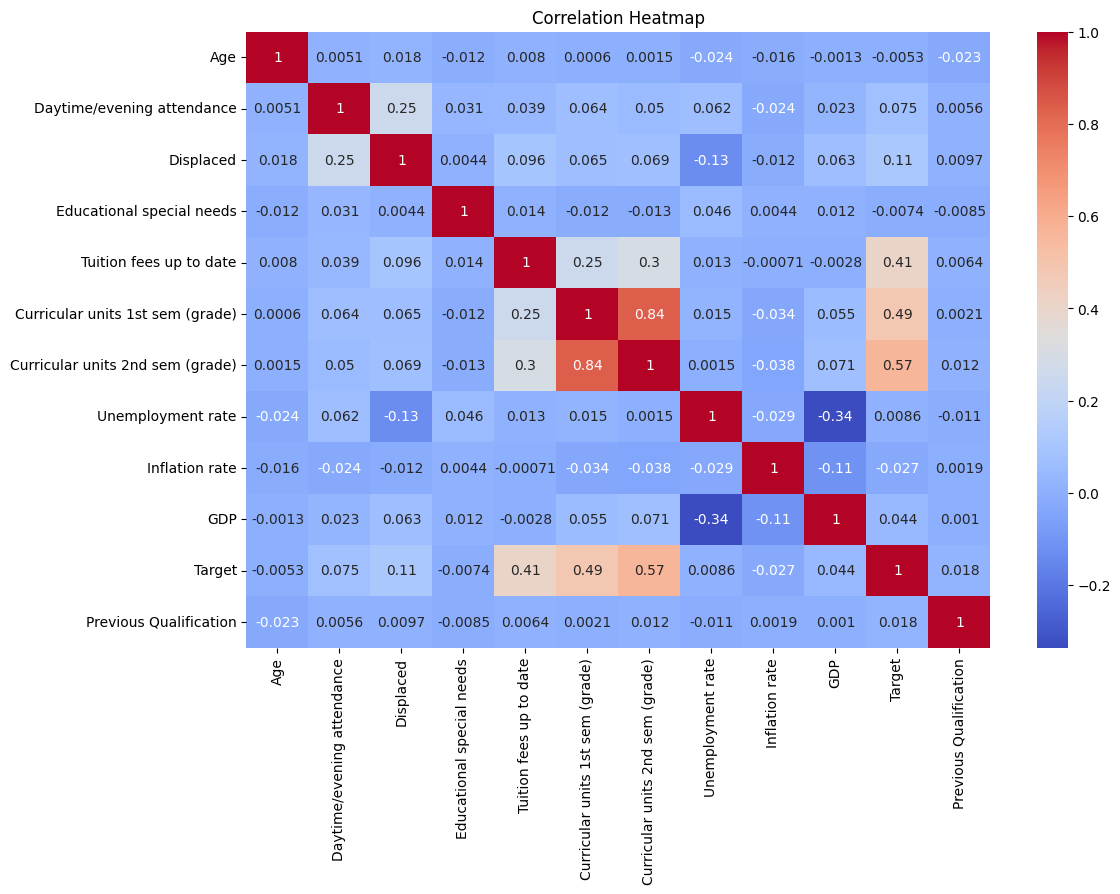

In [37]:
# 22. Correlation Heatmap
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [38]:
# 23. Time Series Analysis (Assuming you have a timestamp column)
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Dropout rates over time
dropout_over_time = data[data['Target'] == 0]['Target'].resample('M').count()
graduate_over_time = data[data['Target'] == 1]['Target'].resample('M').count()

plt.figure(figsize=(12, 6))
plt.plot(dropout_over_time.index, dropout_over_time, label='Dropout')
plt.plot(graduate_over_time.index, graduate_over_time, label='Graduate')
plt.title('Student Dropout and Graduate Rates Over Time')
plt.xlabel('Time')
plt.ylabel('Count')
plt.legend()
plt.show()

KeyError: 'Date'

In [41]:
#24. import folium

# Assuming you've loaded your dataset correctly and have 'lat' and 'lng' columns
map = folium.Map(location=[data['lat'].mean(), data['lng'].mean()], zoom_start=6)

for index, row in data.iterrows():
    color = 'green' if row['Target'] == 1 else 'red'
    folium.CircleMarker([row['lat'], row['lng']], radius=3, color=color).add_to(map)

map.save('student_dropout_map.html')


KeyError: 'lat'

 4. Building Models

In [40]:
# 25. Encode categorical variables
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])  # Example for encoding 'Gender'
# Perform One-Hot Encoding for 'Area' and 'Caste' if needed

# Scale numerical features
scaler = StandardScaler()
numerical_features = ['Age', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)', 'Unemployment rate', 'Inflation rate', 'GDP']
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Split the Data
X = data.drop(columns=['Target'])  # Features
y = data['Target']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Building
# Create instances of classifiers and fit them to the training data
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

# Repeat the above step for other classifiers

# Model Evaluation
# Make predictions and evaluate the models
y_pred = decision_tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')  # Choose an appropriate average for multi-class classification
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

# Repeat the evaluation step for other classifiers

# Hyperparameter Tuning (Optional)
# Use GridSearchCV or RandomizedSearchCV to find the best hyperparameters for your models

# Ensemble Modeling (Optional)
# Create an ensemble of your models if desired

# Visualize results if needed
# You can use libraries like Plotly or Matplotlib to create visualizations

ValueError: could not convert string to float: 'Political Science'